In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
df= pd.read_csv('telecom.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df['Date']= pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [7]:
df['month']= df['Date'].dt.month_name()

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [9]:
daily= df.groupby(['Date']).size()

In [10]:
daily

Date
2015-04-01    18
2015-04-02    27
2015-04-03    15
2015-04-04    12
2015-04-05     6
              ..
2015-06-26    55
2015-06-27    39
2015-06-28    27
2015-06-29    51
2015-06-30    53
Length: 91, dtype: int64

In [11]:
daily=pd.DataFrame(daily).reset_index()

In [12]:
daily

,Date,0
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


In [13]:
daily= daily.rename(columns={0:'count'})

In [14]:
daily

,Date,count
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


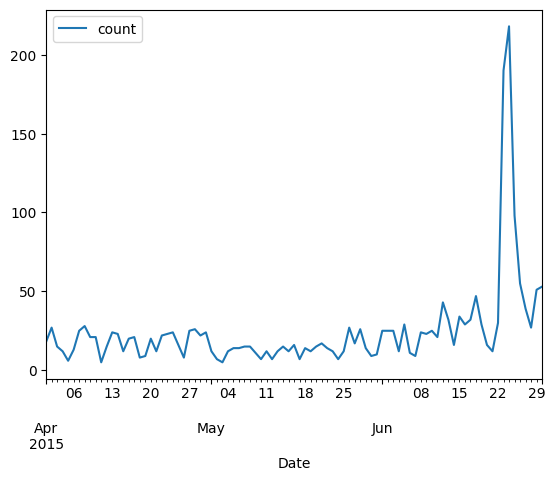

In [15]:
daily.plot(x='Date',y='count',kind='line')
plt.show()

In [16]:
monthly= df.groupby(['month']).size()

In [17]:
monthly

month
April     545
June     1280
May       399
dtype: int64

In [18]:
monthly=pd.DataFrame(monthly).reset_index()

In [19]:
monthly

,month,0
0,April,545
1,June,1280
2,May,399


In [20]:
monthly=monthly.rename(columns={0:'counts'})

In [21]:
monthly

,month,counts
0,April,545
1,June,1280
2,May,399


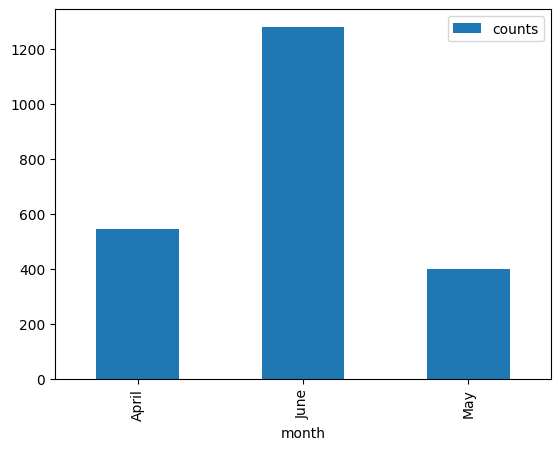

In [22]:
monthly.plot(x='month',y='counts',kind='bar')
plt.show()

In [23]:
df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
5,338519,ISP Charging for arbitrary data limits with ov...,2015-06-12,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,June
6,361148,Throttling service and unreasonable data caps,2015-06-24,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,June
7,359792,Comcast refuses to help troubleshoot and corre...,2015-06-23,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,June
8,318072,Comcast extended outages,2015-06-01,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,June
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,June


In [24]:
df['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [25]:
df['Customer Complaint']=df['Customer Complaint'].apply( lambda x :  x.title() )

In [26]:
df['Customer Complaint'].value_counts()

Comcast                                                            102
Comcast Data Cap                                                    30
Comcast Internet                                                    29
Comcast Data Caps                                                   21
Comcast Billing                                                     18
                                                                  ... 
Monthly Data Caps                                                    1
Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
Lost Emails/Billing                                                  1
Improper Billing And Non Resolution Of Issues                        1
Comcast, Ypsilanti Mi Internet Speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

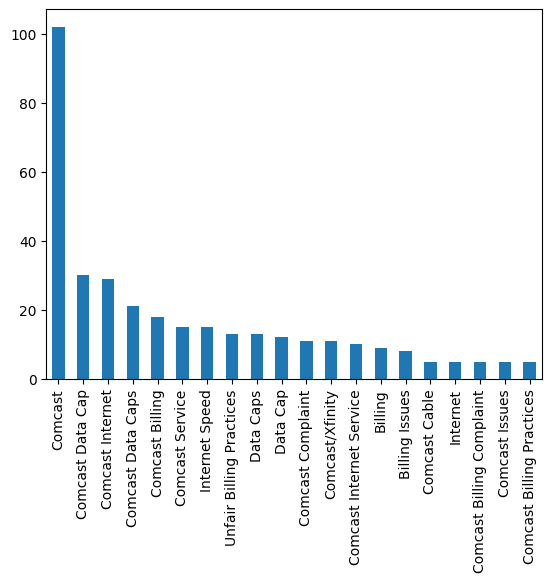

In [27]:
df['Customer Complaint'].value_counts()[:20].plot.bar()
plt.show()

In [28]:
internet_issue_1= df[df['Customer Complaint'].str.contains('Internet')].count()

In [29]:
internet_issue_1

Ticket #                       531
Customer Complaint             531
Date                           531
Date_month_year                531
Time                           531
Received Via                   531
City                           531
State                          531
Zip code                       531
Status                         531
Filing on Behalf of Someone    531
month                          531
dtype: int64

In [30]:
internet_issue_2=df[df['Customer Complaint'].str.contains('Speed')].count()

In [31]:
internet_issue_2

Ticket #                       192
Customer Complaint             192
Date                           192
Date_month_year                192
Time                           192
Received Via                   192
City                           192
State                          192
Zip code                       192
Status                         192
Filing on Behalf of Someone    192
month                          192
dtype: int64

In [32]:
internet_issue_3=df[df['Customer Complaint'].str.contains('Network')].count()

In [33]:
internet_issue_3

Ticket #                       2
Customer Complaint             2
Date                           2
Date_month_year                2
Time                           2
Received Via                   2
City                           2
State                          2
Zip code                       2
Status                         2
Filing on Behalf of Someone    2
month                          2
dtype: int64

In [34]:
internet_issue= internet_issue_1+internet_issue_2+internet_issue_3

In [35]:
internet_issue

Ticket #                       725
Customer Complaint             725
Date                           725
Date_month_year                725
Time                           725
Received Via                   725
City                           725
State                          725
Zip code                       725
Status                         725
Filing on Behalf of Someone    725
month                          725
dtype: int64

In [36]:
service_issue_1= df[df['Customer Complaint'].str.contains('Service')].count()

In [37]:
service_issue_1

Ticket #                       489
Customer Complaint             489
Date                           489
Date_month_year                489
Time                           489
Received Via                   489
City                           489
State                          489
Zip code                       489
Status                         489
Filing on Behalf of Someone    489
month                          489
dtype: int64

In [38]:
service_issue_2= df[df['Customer Complaint'].str.contains('Customer')].count()

In [39]:
service_issue_2

Ticket #                       95
Customer Complaint             95
Date                           95
Date_month_year                95
Time                           95
Received Via                   95
City                           95
State                          95
Zip code                       95
Status                         95
Filing on Behalf of Someone    95
month                          95
dtype: int64

In [40]:
service_issue= service_issue_1+service_issue_2

In [41]:
service_issue

Ticket #                       584
Customer Complaint             584
Date                           584
Date_month_year                584
Time                           584
Received Via                   584
City                           584
State                          584
Zip code                       584
Status                         584
Filing on Behalf of Someone    584
month                          584
dtype: int64

In [42]:
biling_issue_1= df[df['Customer Complaint'].str.contains('Billing')].count()
biling_issue_2=df[df['Customer Complaint'].str.contains('Charges')].count()

In [43]:
biling_issue= biling_issue_1+biling_issue_2

In [44]:
biling_issue

Ticket #                       365
Customer Complaint             365
Date                           365
Date_month_year                365
Time                           365
Received Via                   365
City                           365
State                          365
Zip code                       365
Status                         365
Filing on Behalf of Someone    365
month                          365
dtype: int64

In [45]:
df.shape

(2224, 12)

In [46]:
other_issue= 2224-(biling_issue+internet_issue+service_issue)

In [47]:
other_issue

Ticket #                       550
Customer Complaint             550
Date                           550
Date_month_year                550
Time                           550
Received Via                   550
City                           550
State                          550
Zip code                       550
Status                         550
Filing on Behalf of Someone    550
month                          550
dtype: int64

In [48]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed And Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [49]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [50]:
df['New_status']= [  'Open'  if i=='Open' or i=='Pending' else 'Closed'  for i in df['Status']                     ]

In [51]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,New_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed And Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed


In [52]:
State_complains=df.groupby(['State','New_status']).size().unstack().fillna(0) 

In [53]:
State_complains['Open' ].sort_values()

State
New York                 0.0
Nevada                   0.0
Arkansas                 0.0
Rhode Island             0.0
Ohio                     0.0
Iowa                     0.0
District of Columbia     0.0
North Carolina           0.0
Montana                  0.0
Louisiana                1.0
Kansas                   1.0
Missouri                 1.0
Vermont                  1.0
District Of Columbia     2.0
Maine                    2.0
Connecticut              3.0
Kentucky                 3.0
South Carolina           3.0
West Virginia            3.0
New Hampshire            4.0
New Mexico               4.0
Minnesota                4.0
Delaware                 4.0
Arizona                  6.0
Utah                     6.0
Alabama                  9.0
Indiana                  9.0
Virginia                11.0
Massachusetts           11.0
Oregon                  13.0
Maryland                15.0
Mississippi             16.0
New Jersey              19.0
Pennsylvania            20.0
Colorado

<AxesSubplot:xlabel='State'>

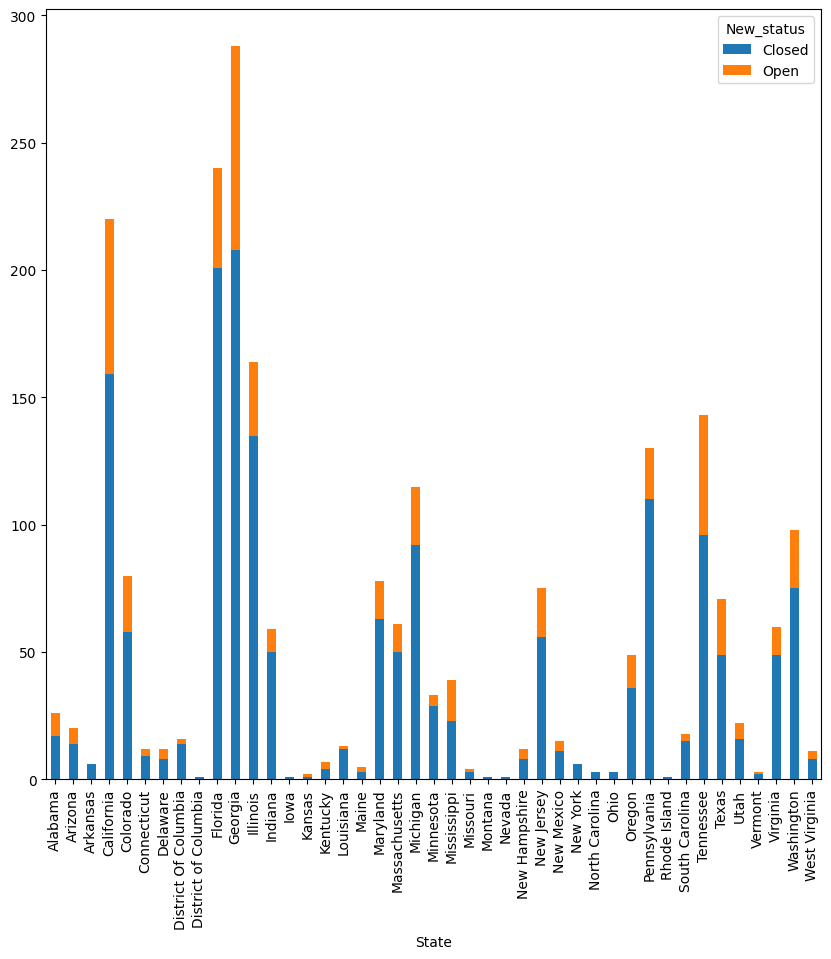

In [54]:
State_complains.plot.bar(stacked=True,figsize=(10,10))

In [55]:
State_complains

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [56]:
df['State'].value_counts()[:5]

Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: State, dtype: int64

In [57]:
unresolved_complains= df.groupby(['State','New_status']).size().unstack().fillna(0).sort_values(by='Open', ascending=False)

In [58]:
unresolved_complains

New_status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


In [59]:
unresolved_complains['unresolved_complains_percentage']=unresolved_complains["Open"]/unresolved_complains["Open"].sum()*100

In [60]:
unresolved_complains

New_status,Closed,Open,unresolved_complains_percentage
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


In [61]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,New_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed And Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed


In [62]:
resolved_data_via= df.groupby(['Received Via','New_status']).size().unstack()

In [63]:
resolved_data_via

New_status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [64]:
resolved_data_via['percent_solved_complains']= resolved_data_via['Closed']/resolved_data_via['Closed'].sum()*100

In [65]:
resolved_data_via

New_status,Closed,Open,percent_solved_complains
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886
